### <font color='red'>PROBLEM STATEMENT</font>

In [ ]:
PREDICTION OF CLOSE PRICE OF STOCK 

### <font color='red'>TERMINOLOGY</font>

In [ ]:
CLOSE - CLOSING PRICE AT A SINGLE DAY OF STOCK
OPEN  - OPEN PRICE 
VOL   - MEASURE OF NUMBER OF SHARES TRADED IN STOCK

### <font color='red'>DESCRIPTION</font>

In [ ]:
LSTM  - LONG SHORT TERM MEMORY
->RNN Architecture in deepl
->Feedback Connections
->REMEMBER STATE AND FORGET STATE

### <font color='red'>SOLUTION</font>

In [33]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential #keras->dl API
from keras.layers import Dense,LSTM 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### <font color='red'>IMPORT FILE</font>

In [34]:
from pandas_datareader.data import DataReader
df=pd.read_csv('Book1.csv') 

In [35]:
df.head()

,date,close,vol,open,high,low
0,13-03-1986,0.0621,1.031789e+09,0.0566,0.0649,0.0566
1,14-03-1986,0.0643,3.081600e+08,0.0621,0.0654,0.0621
2,15-03-1986,0.0647,3.090700e+08,0.0521,0.0754,0.0631
3,16-03-1986,0.0664,-4.154688e+08,0.0675,0.0660,0.0650
4,17-03-1986,0.0665,-4.154688e+08,0.0676,0.0659,0.0643


### <font color='red'>VISUALIZE 'CLOSE' AGAINST 'YEAR'</font>

<AxesSubplot:title={'center':'Stock Closed Priced since 1986'}, xlabel='date'>

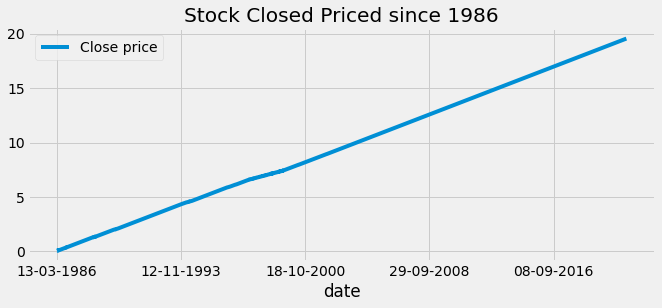

In [36]:
df.plot(x = 'date', y = 'close', label = "Close price", figsize = (10,4), title = "Stock Closed Priced since 1986")

In [37]:
df.shape

(9173, 6)

### <font color='red'>VISUALIZE CLOSE PRICE HIST</font>

<AxesSubplot:title={'center':'Close Price History'}, xlabel='date'>

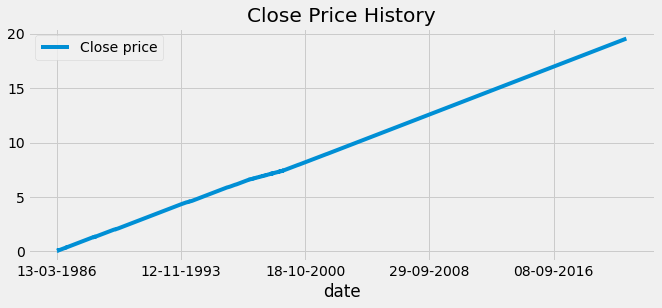

In [38]:
#pd.set_option("display.max.columns", None)
df.plot(x = 'date', y = 'close', label = "Close price", figsize = (10,4), title = "Close Price History")

### <font color='red'>CREATE NUMPY ARRAY WITH 'CLOSE' VALUES</font>
#### <font color='teal'> TRAIN 'CLOSE' </font>

In [39]:
data=df.filter(['close'])
ds=data.values
training_data_len=math.ceil(len(ds)*0.9)   #ttl->9173

training_data_len 

8256

In [40]:
len(ds)

9173

In [41]:
data  #close column

,close
0,0.0621
1,0.0643
2,0.0647
3,0.0664
4,0.0665
...,...
9168,19.5343
9169,19.5365
9170,19.5387
9171,19.5409


In [42]:
ds   #column values

array([[ 0.0621],
       [ 0.0643],
       [ 0.0647],
       ...,
       [19.5387],
       [19.5409],
       [19.5431]])

## <font color='blue'>* DATA PRE PROCESSING</font>
### <font color='red'>SCALE THE DATA</font>
#### <font color='teal'>NORMALIZE DATA WITHIN RANGE TO SPEED UP</font>

In [43]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(ds)

scaled_data

array([[0.00000000e+00],
       [1.12930548e-04],
       [1.33463375e-04],
       ...,
       [9.99774139e-01],
       [9.99887069e-01],
       [1.00000000e+00]])

### <font color='red'>**CREATE SCALED-TRAINING DATASET**</font>

In [44]:
train_data=scaled_data[0:training_data_len, :]
#split
x_train=[]  #independent vars
y_train=[]  #dependent on x


for i in range(60, len(train_data)): #i=60 - 9k
    x_train.append(train_data[i-60:i, 0]) #60 values-->0-59th pos
    y_train.append(train_data[i,0])#61st value-->60th pos
    if i<=60:
        print(x_train)
        print(y_train)


[array([0.        , 0.00011293, 0.00013346, 0.00022073, 0.00022586,
       0.00033879, 0.00045172, 0.00056465, 0.00067758, 0.00045172,
       0.00056465, 0.00079051, 0.00090344, 0.00101637, 0.00112931,
       0.00079051, 0.00056465, 0.00090344, 0.00124224, 0.00135517,
       0.0014681 , 0.00158103, 0.00169396, 0.0014681 , 0.00203275,
       0.00180689, 0.00191982, 0.00203275, 0.00214568, 0.00225861,
       0.00214568, 0.00191982, 0.00237154, 0.00248447, 0.0025974 ,
       0.00271033, 0.00282326, 0.0025974 , 0.00248447, 0.00293619,
       0.00304912, 0.00316206, 0.00327499, 0.00338792, 0.00316206,
       0.00372671, 0.00350085, 0.00361378, 0.00372671, 0.00383964,
       0.00395257, 0.0040655 , 0.00417843, 0.00429136, 0.00440429,
       0.00451722, 0.00463015, 0.00474308, 0.00485601, 0.00496894])]
[0.005081874647092039]


### <font color='red'>X-TRAIN & Y-TRAIN TO NUMPY ARRAYS</font>

In [45]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [46]:
x_train.shape

(8196, 60)

### <font color='red'>TRANSFORM 2D-3D FOR LSTM</font>

In [47]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))  #(no.of samples=no.of rows=9113; no. of cols=60; no.of features=1)
x_train.shape

(8196, 60, 1)

### <font color='red'>BUILD MODEL</font>

In [48]:
model = Sequential()   #builds model of plain stack with layers of 1-i/p ; 1-o/p
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1))) #60,1   layer 1
model.add(LSTM(50, return_sequences=False))                                   #        layer 2
model.add(Dense(25))   #densely cnctd neuron netwrk layer with 25 neurons
model.add(Dense(1))

### <font color='red'>COMPILE</font>

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error') #to define loss 

In [51]:
model.fit(x_train, y_train, batch_size=2, epochs=1) #bs-number of training examples utilized in one iteration; epochs-number of passes of the entire training dataset the machine learning algorithm has completed

4098/4098 [==============================] - 137s 33ms/step - loss: 2.9094e-05


In [28]:
test_data=scaled_data[training_data_len-60:, :]
x_test=[]
y_test=ds[training_data_len:, :] #containes vals which the model is about to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0]) #past 60 vals

### <font color='red'>CONVERT TO NUMPY ARRAY</font>

In [29]:
x_test=np.array(x_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #2D-3D

x_test.shape

(917, 60, 1)

### <font color='red'>CLOSE PRICE WHICH MODEL PREDICTS</font>

In [30]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

array([[17.487923],
       [17.490032],
       [17.492142],
       [17.494255],
       [17.496365],
       [17.498474],
       [17.500586],
       [17.502697],
       [17.504808],
       [17.506916],
       [17.509027],
       [17.511135],
       [17.513247],
       [17.515358],
       [17.517467],
       [17.519577],
       [17.521687],
       [17.523798],
       [17.525906],
       [17.528017],
       [17.530125],
       [17.532236],
       [17.534348],
       [17.536457],
       [17.538565],
       [17.540674],
       [17.542786],
       [17.544891],
       [17.547   ],
       [17.549112],
       [17.55122 ],
       [17.55333 ],
       [17.555437],
       [17.557547],
       [17.559656],
       [17.561766],
       [17.563873],
       [17.565983],
       [17.568092],
       [17.5702  ],
       [17.57231 ],
       [17.574415],
       [17.576525],
       [17.578632],
       [17.580742],
       [17.58285 ],
       [17.584957],
       [17.587067],
       [17.589172],
       [17.59128 ],


### <font color='red'>ROOT MEAN SQUARED ERROR</font>

In [31]:
rmse=np.sqrt(np.mean(predictions-y_test)**2) #rmse to measure ACCURACY IN MODEL PREDICTION
rmse

0.09857190117789198

<ipython-input-32-db9d2277594c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


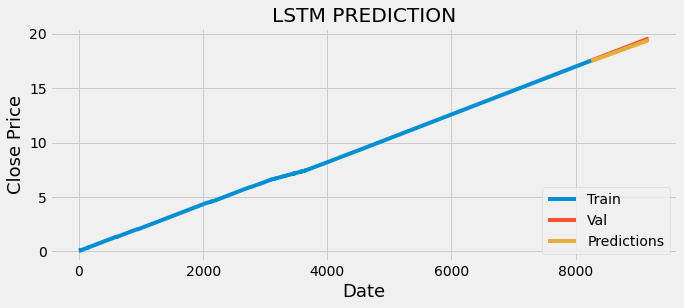

In [32]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

plt.figure(figsize=(10,4))
plt.title('LSTM PREDICTION')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train','Val', 'Predictions'], loc='lower right')
plt.show()

<AxesSubplot:title={'center':'LSTM PREDICTIONS'}, xlabel='Date', ylabel='Close price'>

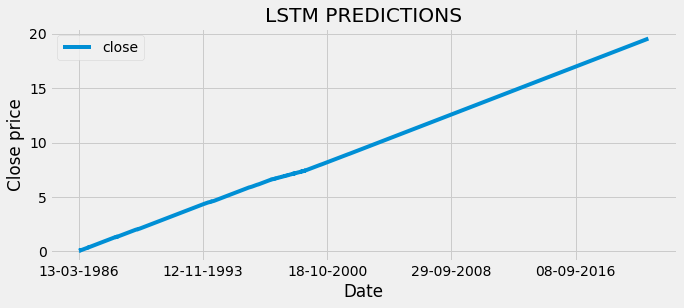

In [101]:
df.plot(x = 'date', xlabel = "Date", y = 'close', ylabel = "Close price", figsize = (10,4), title = "LSTM PREDICTIONS", 
     legend =['Train','Val', 'Predictions'] )

In [102]:
valid

,close,Predictions
8256,17.5367,18.987194
8257,17.5389,18.989473
8258,17.5411,18.991753
8259,17.5433,18.994034
8260,17.5455,18.996317
...,...,...
9168,19.5343,21.027071
9169,19.5365,21.029037
9170,19.5387,21.031076
9171,19.5409,21.033169
